## Student #1 ID: 207781956

## Student #2 ID:

# Exercise 1: Decision Trees

In this assignment you will implement a Decision Tree algorithm as learned in class.

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. Write **efficient vectorized** code whenever possible. Some calculations in this exercise take several minutes when implemented efficiently, and might take much longer otherwise. Unnecessary loops will result in point deduction.
1. You are responsible for the correctness of your code and should add as many tests as you see fit. Those tests will not be graded nor checked.
1. You are free to add code and markdown cells as you see fit.
1. Write your functions in this jupyter notebook only. Do not create external python modules and import from them.
1. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/) and [numpy](https://www.numpy.org/devdocs/reference/) only, unless otherwise mentioned.
1. Your code must run without errors. It is a good idea to restart the notebook and run it from end to end before you submit your exercise.
1. Answers to qualitative questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. **No not use ZIP or RAR**. For example, your submission should look like this: `123456789.ipynb` if you worked by yourself or `123456789_987654321.ipynb` if you worked in pairs.

## In this exercise you will perform the following:
1. Practice OOP in python.
2. Implement two impurity measures: Gini and Entropy.
3. Construct a decision tree algorithm.
4. Prune the tree to achieve better results.
5. Visualize your results.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Make the notebook automatically reload external python modules
%load_ext autoreload
%autoreload 2

## Warmup - OOP in python

Our desicion tree will be implemented using a dedicated python class. Take a minute and practice your object oriented skills. Create a tree with some nodes and make sure you understand how objects in python work.

In [5]:
class Node(object):
    def __init__(self, data):
        self.data = data
        self.children = []

    def add_child(self, node):
        self.children.append(node)

In [6]:
n = Node(5)
p = Node(6)
q = Node(7)
n.add_child(p)
n.add_child(q)
n.children

[<__main__.Node at 0x21909440b90>, <__main__.Node at 0x21909440cd0>]

## Data preprocessing

We will use the breast cancer dataset that is available as a part of sklearn. In this example, our dataset will be a single matrix with the **labels on the last column**. Notice that you are not allowed to use additional functions from sklearn.

In [7]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# load dataset
X, y = datasets.load_breast_cancer(return_X_y = True)
X = np.column_stack([X,y]) # the last column holds the labels

# split dataset
X_train, X_test = train_test_split(X, random_state=99)

print("Training dataset shape: ", X_train.shape)
print("Testing dataset shape: ", X_test.shape)



Training dataset shape:  (426, 31)
Testing dataset shape:  (143, 31)


## Impurity Measures (10 points)

Impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. Implement the functions `calc_gini` (5 points) and `calc_entropy` (5 points). You are encouraged to test your implementation.

In [8]:
def calc_gini(data):
    """
    Calculate gini impurity measure of a dataset.
 
    Input:
    - data: any dataset where the last column holds the labels.
 
    Returns the gini impurity.    
    """
   
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    
    # Extract labels (last column)
    labels = data[:, -1]
    
    # If no data, return 0 (pure)
    if len(labels) == 0:
        return 0.0
    
    # Count occurrences of each class
    unique_labels, counts = np.unique(labels, return_counts=True)
    
    # Calculate probabilities
    probabilities = counts / len(labels)
    
    # Calculate Gini impurity: 1 - sum(p_i^2)
    gini = 1.0 - np.sum(probabilities ** 2)
    
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return gini

In [9]:
def calc_entropy(data):
    """
    Calculate the entropy of a dataset.

    Input:
    - data: any dataset where the last column holds the labels.

    Returns the entropy of the dataset.    
    """
    entropy = 0.0
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    # Extract labels (last column)
    labels = data[:, -1]
    
    # If no data, return 0 (pure)
    if len(labels) == 0:
        return 0.0
    
        
    # Count occurrences of each class
    unique_labels, counts = np.unique(labels, return_counts=True)
    
    # Calculate probabilities
    probabilities = counts / len(labels)
    
    # Calculate Entropy: - sum(p_i * log2(p_i))
    entropy = -np.sum(probabilities * np.log2(probabilities))

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return entropy


## Building a Decision Tree (50 points)

Use a Python class to construct the decision tree. Your class should support the following functionality:

1. Initiating a node for a decision tree. You will need to use several class methods and class attributes and you are free to use them as you see fit. We recommend that every node will hold the **feature** and **value** used for the split and the **children** of that node. In addition, it might be a good idea to store the **prediction** in that node, the **height** of the tree for that node and whether or not that node is a **leaf** in the tree.
2. Your code should support both Gini and Entropy as impurity measures. 
3. The provided data includes continuous data. For this exercise, create at most a **single split** for each node of the tree (your tree will be binary). Determine the threshold for splitting by checking all possible features and the values available for splitting. When considering the values, take the average of each consecutive pair. For example, for the values [1,2,3,4,5] you should test possible splits on the values [1.5, 2.5, 3.5, 4.5]. 
5. After you complete building the class for a decision node in the tree, complete the function `build_tree`. This function takes as input the training dataset and the impurity measure. Then, it initializes a root for the decision tree and constructs the tree according to the procedure you saw in class.
1. Once you are finished, construct two trees: one with Gini as an impurity measure and the other using Entropy.

In [25]:
class DecisionNode:
    '''
    This class will hold everyhing you need to construct a node in a DT. You are required to 
    support basic functionality as previously described. It is highly recommended that you  
    first read and understand the entire exercises before diving into this class.
    You are allowed to change the structure of this class as you see fit.
    '''
 


# ==============================
# Decision Node class
# ==============================
class DecisionNode:
    def __init__(self, data, height=0):
        self.data = data
        self.height = height
        self.children = []
        self.is_leaf = True
        self.split_feature = None
        self.split_value = None
        self.prediction = None  # majority class if leaf

    def add_child(self, node):
        self.children.append(node)

    def check_split(self, feature, value):
        sorted_data = self.data[self.data[:, feature].argsort()]
        split_idx = np.argmax(sorted_data[:, feature] > value)
        if split_idx == 0 and sorted_data[0, feature] > value:
            greater_child = sorted_data
            not_greater_child = np.empty((0, self.data.shape[1]))
        else:
            greater_child = sorted_data[split_idx:]
            not_greater_child = sorted_data[:split_idx]
        return greater_child, not_greater_child

    def split(self, impurity_measure):
        best_gain = 0.0
        best_feature = None
        best_value = None
        best_splits = None

        n_features = self.data.shape[1] - 1
        node_impurity = impurity_measure(self.data)

        for feature in range(n_features):
            feature_data = self.data[:, feature]
            sorted_indices = np.argsort(feature_data)
            sorted_data = self.data[sorted_indices][:, [feature, -1]]

            unique_values = np.unique(sorted_data[:, 0])
            if len(unique_values) == 1:
                continue  # cannot split
            possible_splits = [(unique_values[i] + unique_values[i+1])/2 for i in range(len(unique_values)-1)]

            for value in possible_splits:
                greater, not_greater = self.check_split(feature, value)
                w_greater = len(greater) / len(self.data)
                w_not_greater = len(not_greater) / len(self.data)
                gain = node_impurity - (w_greater * impurity_measure(greater) + w_not_greater * impurity_measure(not_greater))
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_value = value
                    best_splits = (greater, not_greater)

        if best_splits is not None:
            self.is_leaf = False
            self.split_feature = best_feature
            self.split_value = best_value
            left_child = DecisionNode(best_splits[1], height=self.height+1)
            right_child = DecisionNode(best_splits[0], height=self.height+1)
            self.add_child(left_child)
            self.add_child(right_child)
        else:
            # no split possible > leaf
            self.is_leaf = True
            labels, counts = np.unique(self.data[:, -1], return_counts=True)
            self.prediction = labels[np.argmax(counts)]


In [26]:
def build_tree(data, impurity_measure):
    """
    Build a tree using the given impurity measure and training dataset. 
    You are required to fully grow the tree until all leaves are pure. 
 
    Input:
    - data: the training dataset.
    - impurity: the chosen impurity measure. Notice that you can send a function
                as an argument in python.
 
    Output: the root node of the tree.
    """
    root = DecisionNode(data)
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    
# Queue-based tree builder (using list as queue)


    queue = [root]  # use list as queue

    while queue:
        node = queue.pop(0)  # FIFO
        if len(np.unique(node.data[:, -1])) == 1:
            node.is_leaf = True
            node.prediction = node.data[0, -1]
            continue

        node.split(impurity_measure)
        if not node.is_leaf:
            queue.extend(node.children)

    return root
    
    
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return root


In [27]:
# python support passing a function as arguments to another function.
tree_gini = build_tree(data=X_train, impurity_measure=calc_gini) 
tree_entropy = build_tree(data=X_train, impurity_measure=calc_entropy)

## Tree evaluation (10 points)

Complete the functions `predict` and `calc_accuracy`.

After building both trees using the training set (using Gini and Entropy as impurity measures), you should calculate the accuracy on the test set and print the measure that gave you the best test accuracy. For the rest of the exercise, use that impurity measure. (10 points)

In [49]:

### note to us: needs to see if they want to predict one instance or multiple instances at once ->
#I think that one, because they say - instance: an row vector from the dataset.

"""
def predict(node, dataset):
    
    Predict a given instance using the decision tree
 
    Input:
    - root: the root of the decision tree.
    - instance: an row vector from the dataset. 
 
    Output: the prediction of the instance.
    
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    # Start with all indices of the dataset
   

    X = dataset[:, :-1]  # take only features
    n_samples = X.shape[0]
    predictions = np.zeros(n_samples)

    for i in range(n_samples):
        current = node
        instance = X[i, :]

        # Traverse until we hit a leaf
        while not current.is_leaf:
            if instance[current.split_feature] <= current.split_value:
                current = current.children[0]  # left branch
            else:
                current = current.children[1]  # right branch

        predictions[i] = current.prediction

    return predictions
    
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
"""

#this one takes one instance instead of the whole dataset
def predict(node, instance):
    """
    Predict a given instance using the decision tree
 
    Input:
    - root: the root of the decision tree.
    - instance: an row vector from the dataset. 
 
    Output: the prediction of the instance.
    """
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    
    instance = instance[:-1]  # take only features
    current = node

    # Traverse until we hit a leaf
    while not current.is_leaf:
        if instance[current.split_feature] <= current.split_value:
            current = current.children[0]  # left branch
        else:
            current = current.children[1]  # right branch

    pred = current.prediction

    return pred
    
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################



In [50]:
"""
def calc_accuracy(node, dataset):
    Predict a given dataset using the decision tree
 
    Input:
    - node: a node in the decision tree.
    - dataset: the dataset on which the accuracy is evaluated
 
    Output: the accuracy of the decision tree on the given dataset (%).
    y_true = dataset[:, -1]
    y_pred = predict(node, dataset)

    accuracy = (y_pred == y_true).mean() * 100
    return accuracy
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
"""

#this one works with the one onstance version
def calc_accuracy(node, dataset):
    """
    Predict a given dataset using the decision tree
 
    Input:
    - node: a node in the decision tree.
    - dataset: the dataset on which the accuracy is evaluated
 
    Output: the accuracy of the decision tree on the given dataset (%).
    """
    true_labels = dataset[:, -1]
    predicted_labels = [predict(node, instance) for instance in dataset]

    accuracy = (true_labels == predicted_labels).mean() * 100
    return accuracy
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    
    

In [48]:
# train_data is your training dataset (NumPy array)

accuracy_gini = calc_accuracy(tree_gini, X_test)
accuracy_entropy = calc_accuracy(tree_entropy, X_test)

print(f"Gini Accuracy: {accuracy_gini:.2f}%")
print(f"Entropy Accuracy: {accuracy_entropy:.2f}%")

# Select best impurity measure
best_impurity = 'Gini' if accuracy_gini >= accuracy_entropy else 'Entropy'
print("Best impurity measure for this dataset:", best_impurity)

Gini Accuracy: 93.01%
Entropy Accuracy: 93.71%
Best impurity measure for this dataset: Entropy


## Print the tree (10 points)

Complete the function `print_tree`. Your code should do something like this (10 points):
```
[X0 <= 1],
  [X1 <= 2]
    [X2 <= 3], 
       leaf: [{1.0: 10}]
       leaf: [{0.0: 10}]
    [X4 <= 5], 
       leaf: [{1.0: 5}]
       leaf: [{0.0: 10}]
   leaf: [{1.0: 50}]
```

In [31]:
def print_tree(node, feature_names=None, indent=0):
    """
    Prints the tree similar to the example above.
    As long as the print is clear, any printing scheme will be fine
    
    Input:
    - node: a node in the decision tree.
    - feature_names: optional list of feature names, default X0, X1, ...
    - indent: current indentation (used internally for recursion)
    """
    prefix = "  " * indent  # two spaces per level

    # Leaf node
    if node.is_leaf:
        # Count labels in this leaf
        labels, counts = np.unique(node.data[:, -1], return_counts=True)
        label_count = {float(l): int(c) for l, c in zip(labels, counts)}
        print(f"{prefix}leaf: [{label_count}]")
    else:
        # Feature name
        feature_name = f"X{node.split_feature}" if feature_names is None else feature_names[node.split_feature]
        print(f"{prefix}[{feature_name} <= {node.split_value}]")

        # Left child (<= threshold)
        print_tree(node.children[0], feature_names, indent + 1)

        # Right child (> threshold)
        print_tree(node.children[1], feature_names, indent + 1)

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return

In [32]:
# Suppose gini_tree is your trained tree
print_tree(tree_gini)




[X27 <= 0.14235]
  [X3 <= 696.25]
    [X27 <= 0.1349]
      [X10 <= 0.62555]
        [X21 <= 33.349999999999994]
          leaf: [{1.0: 216}]
          [X21 <= 33.56]
            leaf: [{0.0: 1}]
            leaf: [{1.0: 17}]
        [X1 <= 18.630000000000003]
          leaf: [{0.0: 1}]
          leaf: [{1.0: 2}]
      [X15 <= 0.02744]
        [X0 <= 13.225000000000001]
          leaf: [{1.0: 1}]
          leaf: [{0.0: 4}]
        leaf: [{1.0: 6}]
    [X1 <= 16.375]
      leaf: [{1.0: 5}]
      [X19 <= 0.0015485]
        leaf: [{1.0: 1}]
        [X1 <= 18.6]
          [X0 <= 15.809999999999999]
            leaf: [{0.0: 1}]
            leaf: [{1.0: 1}]
          leaf: [{0.0: 15}]
  [X13 <= 21.924999999999997]
    [X21 <= 29.0]
      [X1 <= 20.52]
        leaf: [{1.0: 8}]
        leaf: [{0.0: 1}]
      leaf: [{0.0: 5}]
    [X4 <= 0.079285]
      leaf: [{1.0: 1}]
      leaf: [{0.0: 140}]


## Post pruning (20 points)

Construct a decision tree and perform post pruning: For each leaf in the tree, calculate the test accuracy of the tree assuming no split occurred on the parent of that leaf and find the best such parent (in the sense that not splitting on that parent results in the best testing accuracy among possible parents). Make that parent into a leaf and repeat this process until you are left with the root. On a single plot, draw the training and testing accuracy as a function of the number of internal nodes in the tree. Explain and visualize the results and print your tree (20 points).

In [33]:
###########################################################################
# Post-Pruning with Chi-Square Test (NumPy + pandas)
###########################################################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# =============================
# Helper Functions
# =============================

def majority_class(data):
    """Return the majority class in the data."""
    labels, counts = np.unique(data[:, -1], return_counts=True)
    return labels[np.argmax(counts)]

def count_internal_nodes(node):
    """Count the number of internal (non-leaf) nodes in a tree."""
    if node.is_leaf:
        return 0
    count = 1
    for child in node.children:
        count += count_internal_nodes(child)
    return count

def get_prune_candidates(node):
    """
    Return a list of internal nodes whose children are all leaves.
    These are candidates for post-pruning.
    """
    candidates = []
    if not node.is_leaf and all(child.is_leaf for child in node.children):
        candidates.append(node)
    for child in node.children:
        candidates.extend(get_prune_candidates(child))
    return candidates

def temporarily_prune(node):
    """Temporarily prune a node and return its previous state."""
    state = {
        'is_leaf': node.is_leaf,
        'prediction': getattr(node, 'prediction', None),
        'children': node.children
    }
    node.is_leaf = True
    node.prediction = majority_class(node.data)
    node.children = []
    return state

def restore_node(node, state):
    """Restore a node to its previous state."""
    node.is_leaf = state['is_leaf']
    node.prediction = state['prediction']
    node.children = state['children']

def clone_tree(node):
    """Recursively clone a tree so the original is not modified."""
    new_node = DecisionNode(node.data.copy())
    new_node.height = getattr(node, 'height', None)
    new_node.is_leaf = node.is_leaf
    new_node.split_feature = getattr(node, 'split_feature', None)
    new_node.split_value = getattr(node, 'split_value', None)
    new_node.prediction = getattr(node, 'prediction', None)
    new_node.children = [clone_tree(child) for child in node.children] if node.children else []
    return new_node

import numpy as np
import pandas as pd
import math

def chi_square_pval(feature_values, labels):
    """
    Compute chi-square p-value safely for NumPy + pandas.
    Avoid overflow for large chi2 or degrees of freedom.
    """
    contingency = pd.crosstab(feature_values, labels)
    observed = contingency.values
    expected = np.outer(observed.sum(axis=1), observed.sum(axis=0)) / observed.sum()
    expected[expected == 0] = 1e-9

    chi2 = np.sum((observed - expected) ** 2 / expected)
    dof = (observed.shape[0] - 1) * (observed.shape[1] - 1)

    if dof <= 0:
        return 0.0  # perfect split or no degrees of freedom

    # Approximate p-value using normal approximation
    mean = dof
    std = np.sqrt(2*dof)
    z = (chi2 - mean) / std

    # Use built-in math.erf, NOT np.math
    p_val = 0.5 * (1 - math.erf(z / np.sqrt(2)))
    return min(max(p_val, 0.0), 1.0)



# =============================
# Post-Pruning Function
# =============================

def post_prune_copy(tree, train_data, test_data, p_threshold=0.05):
    """
    Post-prune a tree with chi-square test while keeping the original tree intact.

    Returns:
    - pruned_tree: pruned copy of the tree
    - training_acc: list of training accuracies at each step
    - testing_acc: list of testing accuracies at each step
    - internal_nodes_count: number of internal nodes at each step
    """
    pruned_tree = clone_tree(tree)  # work on a copy

    training_acc = []
    testing_acc = []
    internal_nodes_count = []

    while True:
        # Record stats
        n_internal = count_internal_nodes(pruned_tree)
        internal_nodes_count.append(n_internal)
        training_acc.append(calc_accuracy(pruned_tree, train_data))
        testing_acc.append(calc_accuracy(pruned_tree, test_data))

        # Find candidates for pruning
        candidates = get_prune_candidates(pruned_tree)
        if not candidates:
            break

        # Select best candidate based on chi-square p-value
        best_candidate = None
        best_acc = -1

        for node in candidates:
            # Check chi-square significance
            feature_values = node.data[:, node.split_feature]
            labels = node.data[:, -1]
            p_val = chi_square_pval(feature_values, labels)

            if p_val > p_threshold:
                # Temporarily prune to check accuracy
                state = temporarily_prune(node)
                acc = calc_accuracy(pruned_tree, test_data)
                restore_node(node, state)

                if acc > best_acc:
                    best_acc = acc
                    best_candidate = node

        if best_candidate is None:
            break  # no node meets p-value threshold

        # Permanently prune the best candidate
        temporarily_prune(best_candidate)

    return pruned_tree, training_acc, testing_acc, internal_nodes_count

# =============================
# Plotting Function
# =============================

def plot_pruning(training_acc, testing_acc, internal_nodes_count):
    """
    Plot training and testing accuracy as a function of the number of internal nodes.
    X-axis inverted so fully grown tree is on the left.
    """
    plt.figure(figsize=(8,5))
    plt.plot(internal_nodes_count, training_acc, label="Training Accuracy", marker='o')
    plt.plot(internal_nodes_count, testing_acc, label="Testing Accuracy", marker='o')
    plt.xlabel("Number of Internal Nodes")
    plt.ylabel("Accuracy (%)")
    plt.title("Post-Pruning: Accuracy vs Internal Nodes")
    plt.legend()
    plt.grid(True)
    plt.show()


Training accuracy at each step: [np.float64(100.0), np.float64(99.76525821596243), np.float64(99.53051643192488), np.float64(99.29577464788733), np.float64(99.29577464788733), np.float64(99.29577464788733), np.float64(99.06103286384976), np.float64(98.35680751173709), np.float64(98.35680751173709), np.float64(98.35680751173709), np.float64(98.12206572769952), np.float64(97.88732394366197), np.float64(97.65258215962442), np.float64(96.47887323943662), np.float64(95.30516431924883), np.float64(94.83568075117371), np.float64(92.72300469483568), np.float64(60.56338028169014)]
Testing accuracy at each step: [np.float64(93.00699300699301), np.float64(93.7062937062937), np.float64(94.4055944055944), np.float64(94.4055944055944), np.float64(94.4055944055944), np.float64(94.4055944055944), np.float64(94.4055944055944), np.float64(94.4055944055944), np.float64(94.4055944055944), np.float64(94.4055944055944), np.float64(95.1048951048951), np.float64(95.1048951048951), np.float64(95.1048951048951)

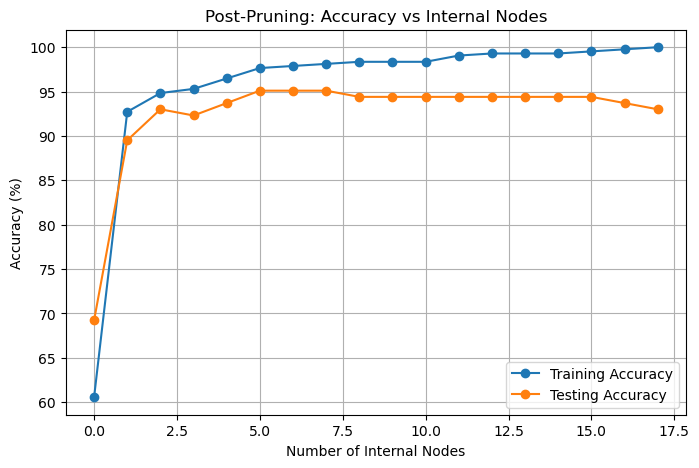

leaf: [{0.0: 168, 1.0: 258}]


In [34]:
# ----------------------------
# 1. Apply post-pruning
# ----------------------------
# p_threshold = 0.05 (default)
pruned_tree, train_acc, test_acc, internal_nodes = post_prune_copy(
    tree_gini, X_train, X_test, p_threshold=0.00000000005)

# ----------------------------
# 2. Print results
# ----------------------------
print("Training accuracy at each step:", train_acc)
print("Testing accuracy at each step:", test_acc)
print("Internal nodes at each step:", internal_nodes)

# ----------------------------
# 3. Plot pruning results
# ----------------------------
plot_pruning(train_acc, test_acc, internal_nodes)


print_tree(pruned_tree)

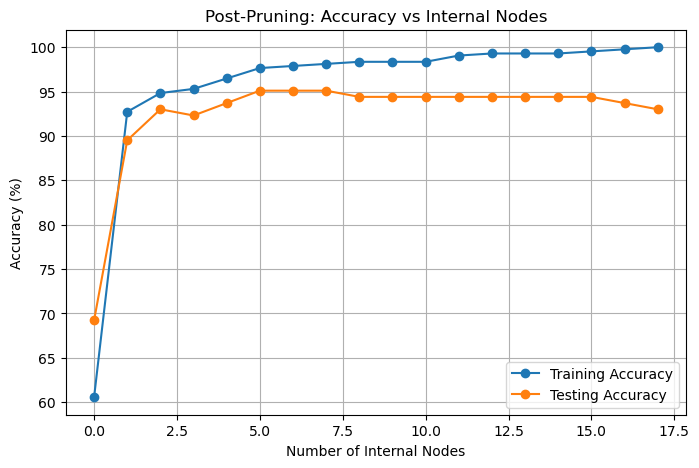

leaf: [{0.0: 168, 1.0: 258}]


In [36]:
# =============================
# Example Usage
# =============================

pruned_tree, train_acc, test_acc, internal_nodes = post_prune_copy(tree_gini, X_train, X_test)

# Plot the training and testing accuracy as the tree is pruned
plot_pruning(train_acc, test_acc, internal_nodes)

# Print the pruned tree
print_tree(pruned_tree)
